# Einleitung zum Versuch "Aggregation and Performance Metrics"

Mit diesem Versuchspaket erhaltet ihr ein umfassendes Verständnis für die Vorteile der Zeitaggregation und die Berechnung von Performance-Metriken in der atmosphärischen Messtechnik. Ihr lernt, wie ihr hochfrequente Sensordaten, die mit Rauschen behaftet sind, aggregiert, um klarere Trends und stabilere Signale zu erhalten, und wie ihr wichtige Kennzahlen wie den Mittelwert, den Mean Absolute Error (MAE) und den Root Mean Squared Error (RMSE) zur Bewertung der Signalqualität einsetzt.

## Hintergrund und Motivation

Moderne Sensorsysteme liefern oftmals Daten mit hoher zeitlicher Auflösung (z.B.: 1-Minuten-Daten), die aufgrund zufälliger Schwankungen und Rauschen schwer zu interpretieren sind. Durch die zeitliche Aggregation – etwa zu stündlichen Mittelwerten – wird das Rauschen reduziert und der zugrunde liegende Trend wird besser sichtbar. 

Darüber versuchen wir die Performance zweier $CO_2$ Sensoren (Vaisala GMP343) gegenüber eines teuren $CO_2$ Referenz Sensors (Picarro G2401) zu verstehen. Hierfür nutzen wir unterschiedliche Berechnungen: Mittelwert, den MAE (Mean Absolute Error), und den RMSE (Root Mean Squared Error).

Diese Kennzahlen helfen, die Qualität und Genauigkeit des aggregierten Signals zu bewerten und unterschiedliche Messsysteme miteinander zu vergleichen.

In [1]:
import polars as pl
import os
import sys
import numpy as np
import polars.selectors as cs

# Add the parent directory to the system path
PROJECT_PATH = os.path.abspath(os.path.join(".."))

if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)
    
from utils.plot_dataframes import plot_columns, plot_column_difference

In [2]:
df_s_3 = pl.read_parquet("../data/2_Aggregation_And_Performance_Metrics/Sensor_3_GMP343_Measurement.parquet") 
df_s_6 = pl.read_parquet("../data/2_Aggregation_And_Performance_Metrics/Sensor_6_GMP343_Measurement.parquet")

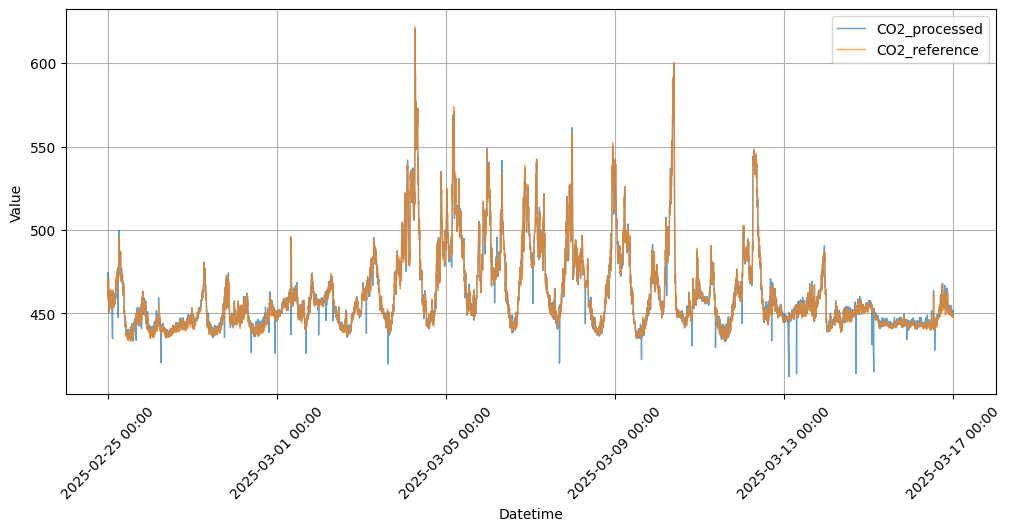

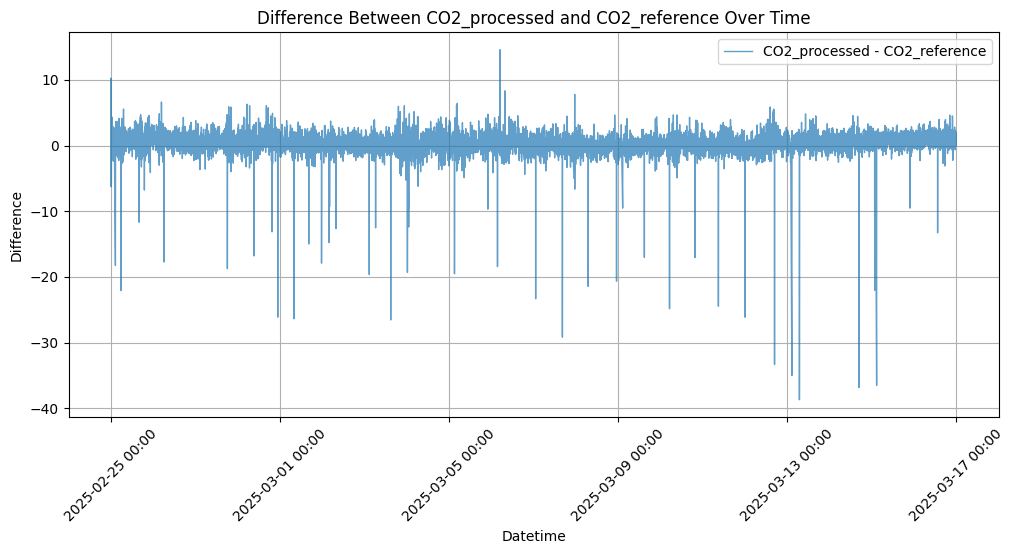

In [3]:
plot_columns(df_s_3, "datetime", ["CO2_processed", "CO2_reference"])
plot_column_difference(df_s_3, "datetime", ["CO2_processed", "CO2_reference"])

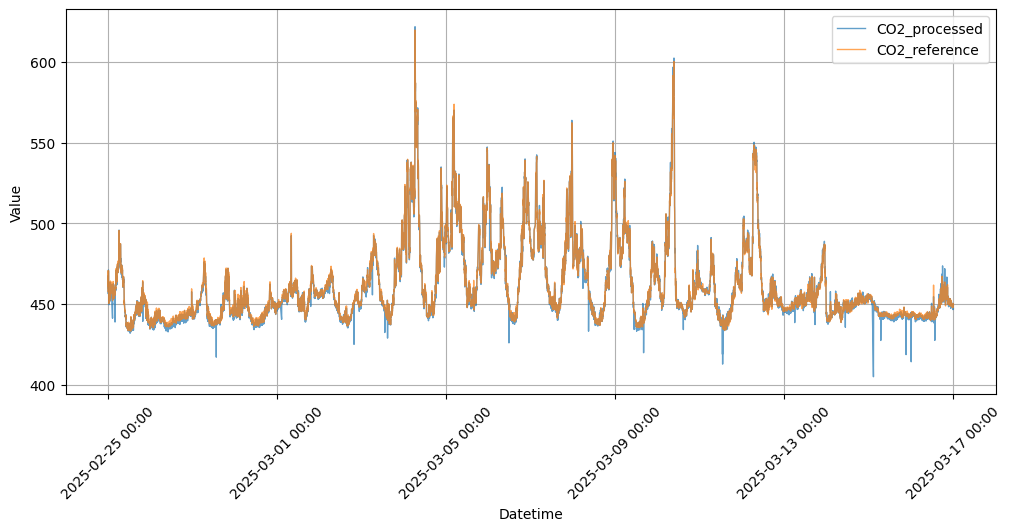

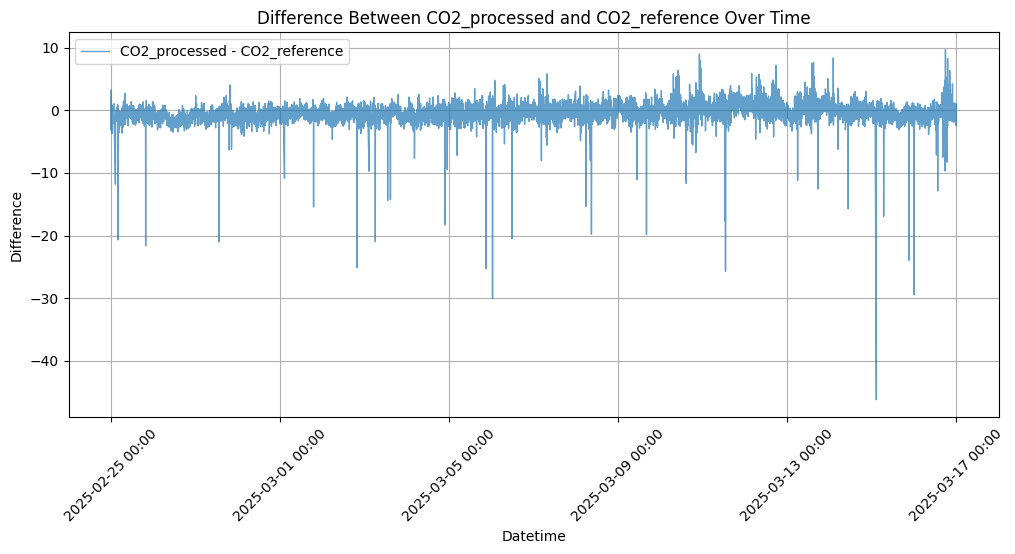

In [4]:
plot_columns(df_s_6, "datetime", ["CO2_processed", "CO2_reference"])
plot_column_difference(df_s_6, "datetime", ["CO2_processed", "CO2_reference"])

# Versuch: Berechnung von Mean, MAE und RMSE

In diesem Versuch analysieren wir Zeitreihen von Sensordaten und zugehörigen Referenzdaten. Ziel ist es, verschiedene Performance-Metriken zu implementieren und zu berechnen, die uns helfen, die Genauigkeit und Qualität der Sensorsignale zu bewerten.

## Hintergrund und Motivation

Sensordaten können von Rauschen, Ausreißern und systematischen Abweichungen beeinflusst werden. Um die Leistung eines Sensorsystems zu beurteilen, vergleichen wir die gemessenen Daten mit Referenzwerten. Dabei sind folgende Metriken von besonderem Interesse:

- **Mean (Mittelwert):**  
  Der Mittelwert der Differenz zwischen den Sensordaten und den Referenzdaten. Er gibt an, ob der Sensor im Durchschnitt über- oder unterschätzt.

  $$
  \text{Mean} = \frac{1}{n} \sum_{i=1}^{n} y_i - \hat{y}_i
  $$

- **Mean Absolute Error (MAE):**  
  Der durchschnittliche absolute Fehler zwischen den Sensordaten und den Referenzdaten. Er zeigt, wie stark die Messwerte im Durchschnitt von den tatsächlichen Werten abweichen.

  $$
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
  $$

- **Root Mean Squared Error (RMSE):**  
  Die Quadratwurzel des durchschnittlichen quadrierten Fehlers. Da hier größere Abweichungen stärker gewichtet werden, reagiert der RMSE empfindlicher auf Ausreißer.

  $$
  \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}
  $$

Diese Metriken liefern unterschiedliche Perspektiven auf die Datenqualität: Während der Mittelwert den zentralen Tendenzwert beschreibt, zeigen MAE und RMSE, wie gut (oder schlecht) die Sensordaten mit den Referenzwerten übereinstimmen. Insbesondere der RMSE hebt größere Fehler hervor, was bei der Identifikation von Ausreißern und systematischen Abweichungen hilfreich sein kann.

## Ziel des Versuchs

- **Implementierung der Performance-Metriken:**  
  Entwickelt Python-Funktionen zur Berechnung von Mean, MAE und RMSE.
  
- **Vergleich der Metriken:**  
  Analysiert, wie sich die Metriken untereinander unterscheiden und welche Aussagekraft sie hinsichtlich der Sensorleistung haben.
  
- **Bewertung der Sensordaten:**  
  Wendet die Funktionen auf gegebene Zeitreihen von Sensordaten und Referenzdaten an, um die Genauigkeit des Sensors zu beurteilen und mögliche Kalibrierungsansätze zu diskutieren.

# Hilreiche Funktionen

[Numpy Documentation](https://numpy.org/doc/2.1/reference/routines.math.html)

Ein numpy array ist eine Liste an Messdaten, die in Python verwendet wird, um numerische Daten effizient zu speichern und zu verarbeiten. Sie ermöglicht schnelle mathematische Operationen und ist besonders nützlich für wissenschaftliche Berechnungen.

In den Funktionen bekommt ihr die Parameter `sensor_measurements` und `reference_measurements` übergeben, die jeweils ein numpy array sind. Diese Parameter repräsentieren die Messwerte des Sensors und die zugehörigen Referenzwerte. Beide Arrays haben die gleich Länge, sodass ihr sie direkt miteinander vergleichen könnt.

Nachfolgend werden einige grundlegende Funktionen vorgestellt, die ihr in diesem Versuch verwenden könnt:

Differenz zwischen zwei numpy arrays:
```
np.array - np.array -> np.array

[2, 2, 2, 2, 2] - [1, 1, 1, 1, 1] -> [1, 1, 1, 1, 1]
```

Mittelwert eines numpy arrays:

```
np.mean(np.array) -> float

np.mean([1, 2, 3, 4, 5]) -> 3.0
```

Betrag der Elemente eines numpy arrays:

```
np.abs(np.array) -> np.array

np.abs([-1, -2, -3, -4, -5]) -> [1, 2, 3, 4, 5]
```

Wurzel aus den Elementen eines numpy arrays:

```
np.sqrt(np.array) -> np.array

np.sqrt([1, 4, 9, 16, 25]) -> [1., 2., 3., 4., 5.]
```

Quadrat der Elemente eines numpy arrays:

```
np.array ** 2 -> np.array

[1, 2, 3, 4, 5] ** 2 -> [ 1,  4,  9, 16, 25]
```


# 🧪 Praktische Übung 1

✅ Aufgaben:

1. **Implementierung der Metriken:**  
   Schreibt Python-Funktionen für Mean, MAE und RMSE

2. **Anwendung und Vergleich:**  
   Wendet die implementierten Funktionen auf die Zeitreihen an und vergleicht die Ergebnisse. Diskutiert, welche Metrik sich stärker an Ausreißern orientiert und welche Metrik als allgemeiner Indikator für die Messgenauigkeit dient.

In [ ]:
def mean(sensor_measurements: np.ndarray, reference_measurements: np.ndarray) -> float:
    """
    Berechnet den Mittelwert der gegebenen Werte.
    """
    # Implementierung des Mittelwerts
    mean = 
    
    return mean

def mae(sensor_measurements: np.ndarray, reference_measurements: np.ndarray) -> float:
    """
    Berechnet den Mean Absolute Error (MAE) zwischen den Sensor- und Referenzdaten.
    """
    # Implementierung des MAE
    mae = 
    
    return mae

def rmse(sensor_measurements: np.ndarray, reference_measurements: np.ndarray) -> float:
    """
    Berechnet den Root Mean Squared Error (RMSE) zwischen den Sensor- und Referenzdaten.
    """
    # Implementierung des RMSE
    rmse = 
    
    return rmse

In [13]:
assert(mean(np.array([-2, 4, 4]), np.array([2, -2, 3])) == 1)
assert(mae(np.array([2, 4, 6]), np.array([1.5, 1, 1])) == 2.8333333333333335)
assert(rmse(np.array([2, 4, 6]), np.array([1, 2, 3])) == 2.160246899469287)

AssertionError: 

In [ ]:
# Sensordaten und Referenzdaten als numpy arrays
sensor_3_data = df_s_3.select(pl.col("CO2_processed")).to_numpy()
reference_data = df_s_3.select(pl.col("CO2_reference")).to_numpy()

print("Mean (Sensor 3):", mean(sensor_3_data, reference_data))
print("MAE: (Sensor 3)", mae(sensor_3_data, reference_data))
print("RMSE: (Sensor 3)", rmse(sensor_3_data, reference_data))

sensor_6_data = df_s_6.select(pl.col("CO2_processed")).to_numpy()
reference_data = df_s_6.select(pl.col("CO2_reference")).to_numpy()

print("Mean (Sensor 6):", mean(sensor_6_data, reference_data))
print("MAE: (Sensor 6)", mae(sensor_6_data, reference_data))
print("RMSE: (Sensor 6)", rmse(sensor_6_data, reference_data))

Mean (Sensor 3): 0.3518541885146903
MAE: (Sensor 3) 1.1044634964210875
RMSE: (Sensor 3) 1.8988939438316637
Mean (Sensor 6): -0.43237901764373793
MAE: (Sensor 6) 1.0759301930097382
RMSE: (Sensor 6) 1.8243936357323267


Fragen:

- Wieso unterscheiden sich die Werte?
- Was ist der treibende Faktor im Unterschied zwischen MAE und RMSE?

--- 

# Versuch: Anwendung des Hampel-Filters zur Ausreißerentfernung

In diesem Versuch erarbeiten wir, wie ein Hampel-Filter eingesetzt werden kann, um Ausreißer aus einem Sensorsignal zu entfernen. Ziel ist es, die Qualität und Aussagekraft der Messdaten zu verbessern, bevor weitere Analysen (z. B. Zeitaggregation und Performance-Metriken) durchgeführt werden.

## Hintergrund

Sensordaten sind häufig von zufälligen Störungen und Ausreißern betroffen, die durch Fehler in der Messung, vorübergehende Störungen oder andere Anomalien verursacht werden können. Solche Ausreißer können die statistische Analyse und die Berechnung von Kennzahlen erheblich verfälschen. 

Der **Hampel-Filter** ist ein robustes Verfahren zur Identifikation und Korrektur von Ausreißern in Zeitreihen. Er basiert auf dem Median und der Median Absolute Deviation (MAD) und bietet den Vorteil, dass er im Vergleich zu anderen Methoden (z. B. dem Z-Score) weniger anfällig für Verzerrungen durch extreme Werte ist.

## Ziel des Versuchs

- **Ausreißererkennung:**  
  Identifiziert einzelne Datenpunkte, die signifikant von den umgebenden Werten abweichen.

- **Signalbereinigung:**  
  Entfernt oder ersetzt diese Ausreißer, um ein glatteres, repräsentativeres Sensorsignal zu erhalten.

- **Vorbereitung für weitere Analysen:**  
  Ein sauberes Signal ermöglicht genauere Zeitaggregation und die Berechnung von Performance-Metriken (wie Mean, MAE, RMSE), die für die Bewertung der Sensorleistung wichtig sind.

# Mathematische Funktion des Hampel-Filters

Der Hampel-Filter ist ein robustes Verfahren zur Identifikation und Korrektur von Ausreißern in Zeitreihen. Im Folgenden wird die mathematische Funktionsweise des Filters erläutert.

## Vorgehensweise im Detail

Gegeben sei eine Zeitreihe

$$
x_1, x_2, \ldots, x_N.
$$

Für jeden Datenpunkt $x_i$ wird in einem festgelegten Fenster (zum Beispiel von $i - k$ bis $i + k$) Folgendes berechnet:

1. **Median im Fenster:**  
   Definiert den Median der Werte im Fenster als

   $$
   m_i = \text{median}\{x_{i-k}, x_{i-k+1}, \ldots, x_{i+k}\}.
   $$

2. **Median Absolute Deviation (MAD):**  
   Berechnet die mittlere absolute Abweichung der Werte vom Median im selben Fenster:

   $$
   \text{MAD}_i = \text{median}\{|x_j - m_i| : j = i-k, \ldots, i+k\}.
   $$

3. **Ausreißererkennung:**  
   Ein Datenpunkt $x_i$ wird als Ausreißer klassifiziert, wenn die Abweichung vom Median einen vorgegebenen Schwellenwert überschreitet. Konkret wird geprüft, ob

   $$
   |x_i - m_i| > t \cdot \text{MAD}_i,
   $$

   wobei $t$ ein Schwellenfaktor (typischerweise z. B. 3) ist. Für normalverteilte Daten kann der Faktor $t$ mit dem Multiplikator (etwa 1.4826) kombiniert werden, um die MAD in eine Schätzung der Standardabweichung zu überführen, falls dies erforderlich ist.

4. **Korrektur der Ausreißer:**  
   Ist die Bedingung erfüllt, wird $x_i$ als Ausreißer betrachtet und üblicherweise durch den Median $m_i$ des Fensters ersetzt. Andernfalls bleibt der Wert unverändert.

## Zusammenfassung der Filterfunktion

Der Hampel-Filter transformiert den ursprünglichen Signalwert $x_i$ zu einem gefilterten Wert $\hat{x}_i$ nach folgender Regel:

$$
\hat{x}_i = 
\begin{cases}
m_i, & \text{wenn } |x_i - m_i| > t \cdot \text{MAD}_i, \\
x_i, & \text{sonst}.
\end{cases}
$$

Diese Methode ist robust gegenüber Ausreißern, da der Median und die MAD wesentlich weniger empfindlich gegenüber extremen Werten sind als arithmetische Mittel und Standardabweichung.

# 🧪 Praktische Übung 2

In dieser Übung wollen wir ein Gefühl dafür entwickeln wie der Input des Hampel Filters die Messreihe verändert. Hierfür testen wir uns durch die Veränderung der Eingabeparamter an eine geeignete Filterung heran.

✅ Aufgabe:

- Verändert die Parameter `window_size` und `n_sigma`, sodass eine geeignete Korrektur der Messdaten erfolgt. 

## System 3

In [7]:
def hampel_filter(series, window_size=7, n_sigmas=3):
    rolling_median = series.rolling(window=window_size, center=True).median()
    mad = lambda x: np.median(np.abs(x - np.median(x)))
    rolling_mad = series.rolling(window=window_size, center=True).apply(mad, raw=True)
    threshold = n_sigmas * rolling_mad
    diff = np.abs(series - rolling_median)
    outlier_mask = diff > threshold

    filtered = series.copy()
    filtered[outlier_mask] = rolling_median[outlier_mask]  # Replace outliers

    return filtered, outlier_mask

Detektierte Ausreißer: 8.278%


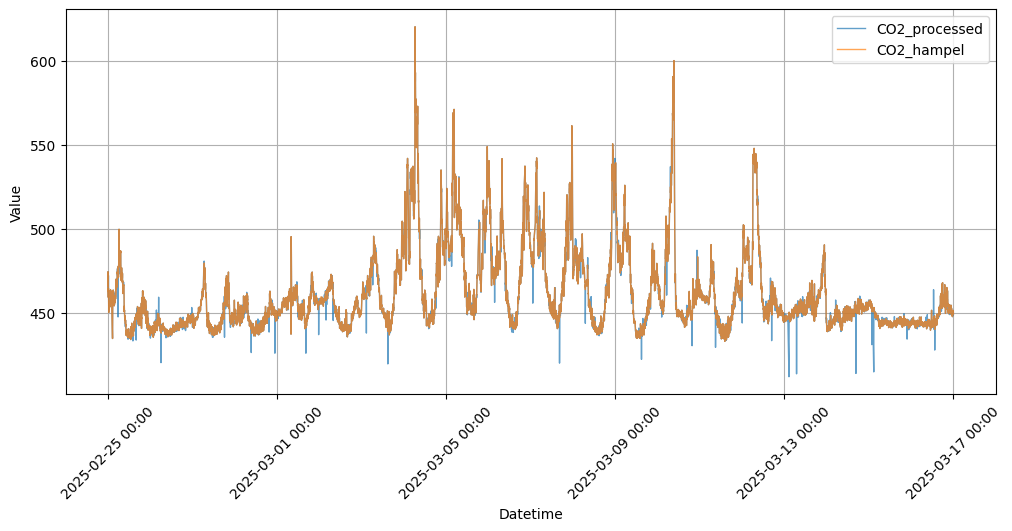

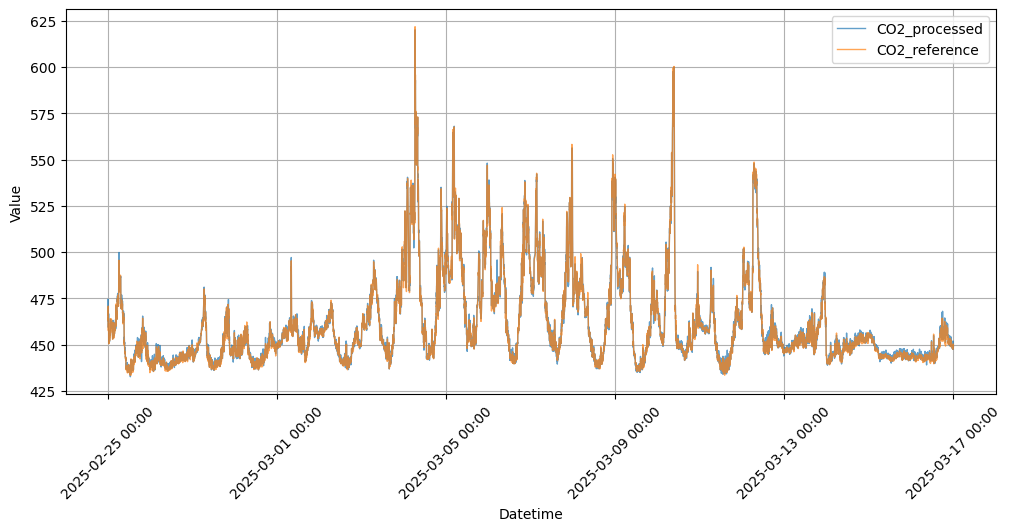

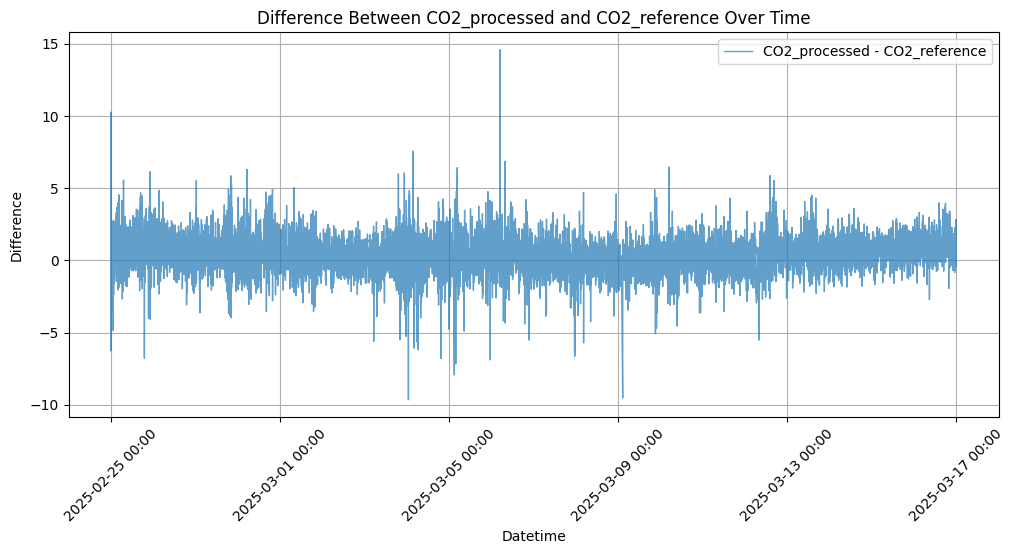

In [ ]:
## Verändere nachfolgende Parameter
window_size = 11
n_sigma = 3.0
##

# Convert to pandas for filtering
co2_series = df_s_3.get_column("CO2_processed").round(2).to_pandas()

# Apply Hampel
filtered_series, outlier_mask = hampel_filter(co2_series, window_size, n_sigma)

# Print spike stats
print(f"Detektierte Ausreißer: {(outlier_mask.sum() / len(co2_series)) * 100:.3f}%")

# Add columns back to Polars
df_s_3 = df_s_3.with_columns([
    pl.Series("CO2_hampel", filtered_series).cast(pl.Float64),
    pl.Series("Outlier_Mask", outlier_mask).cast(pl.Boolean)
        ])

# Filter outliers
df_s_3_filtered = df_s_3.filter(pl.col("Outlier_Mask") == False)

# Extract arrays
sensor_3_data = df_s_3_filtered.select(pl.col("CO2_processed")).to_numpy()
reference_data = df_s_3_filtered.select(pl.col("CO2_reference")).to_numpy()

# Performance metrics
print("Mean (Sensor 3):", mean(sensor_3_data - reference_data))
print("MAE: (Sensor 3)", mae(sensor_3_data, reference_data))
print("RMSE: (Sensor 3)", rmse(sensor_3_data, reference_data))
    
# Plot
plot_columns(df_s_3, "datetime", ["CO2_processed", "CO2_hampel"])
plot_columns(df_s_3_filtered, "datetime", ["CO2_processed", "CO2_reference"])
plot_column_difference(df_s_3_filtered, "datetime", ["CO2_processed", "CO2_reference"])

## System 6

Detektierte Ausreißer: 7.7193%


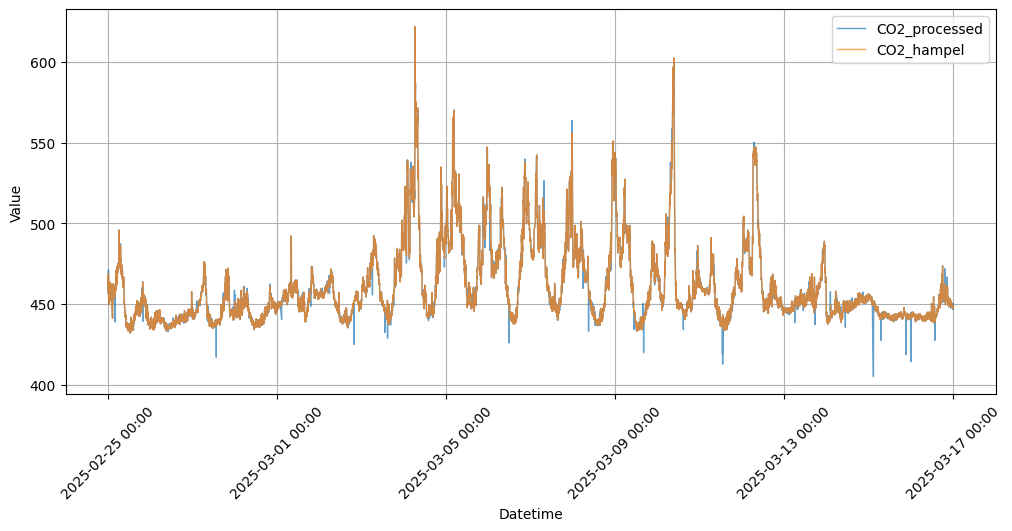

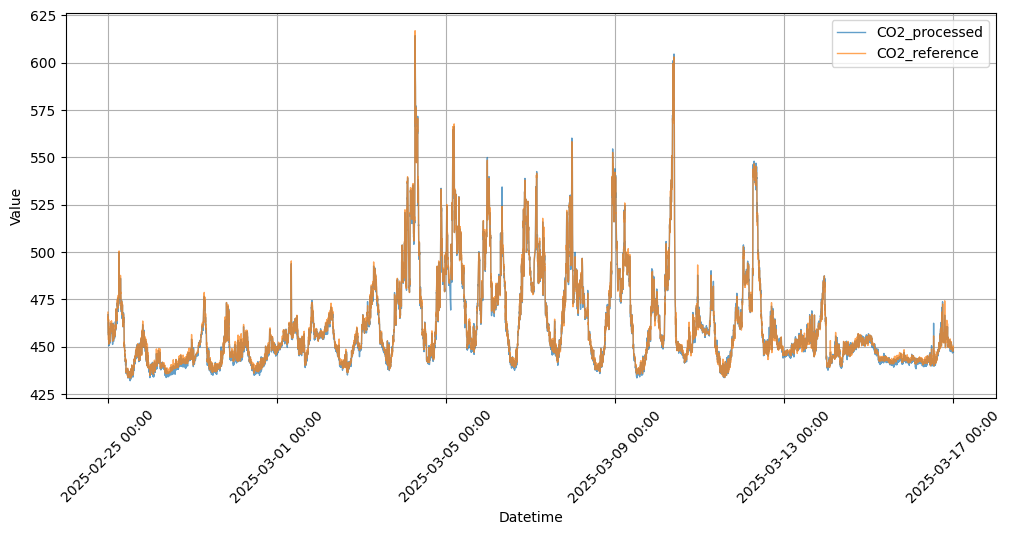

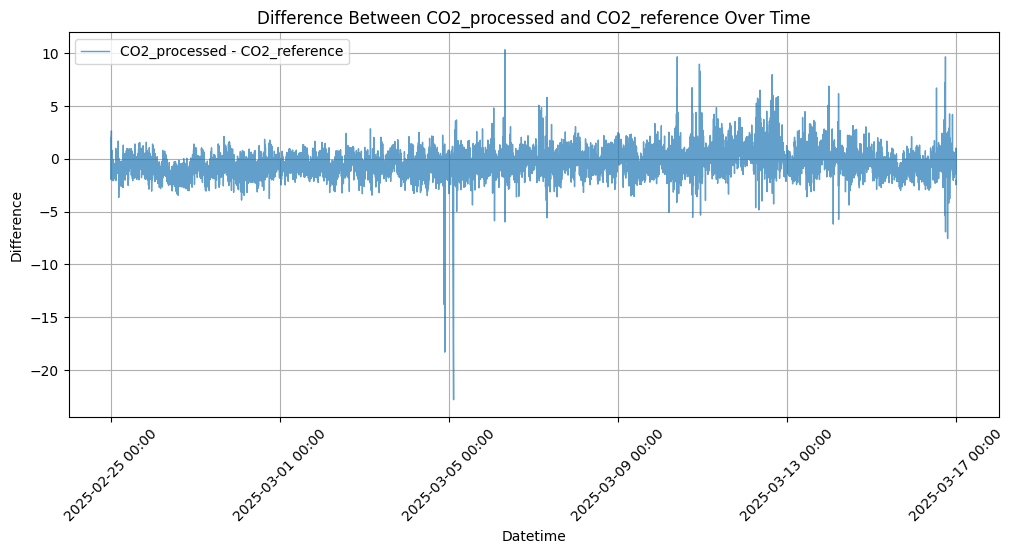

In [ ]:
## Verändere nachfolgende Parameter
window_size = 11
n_sigma = 3.0
##

# Convert to pandas for filtering
co2_series = df_s_6.get_column("CO2_processed").round(2).to_pandas()

# Apply Hampel
filtered_series, outlier_mask = hampel_filter(co2_series, window_size, n_sigma)

# Print spike stats
print(f"Detektierte Ausreißer: {(outlier_mask.sum() / len(co2_series)) * 100:.4f}%")

# Add columns back to Polars
df_s_6= df_s_6.with_columns([
    pl.Series("CO2_hampel", filtered_series).cast(pl.Float64),
    pl.Series("Outlier_Mask", outlier_mask).cast(pl.Boolean)
])


# Filter outliers
df_s_6_filtered = df_s_6.filter(pl.col("Outlier_Mask") == False)

# Extract arrays
sensor_6_data = df_s_6_filtered.select(pl.col("CO2_processed")).to_numpy()
reference_data = df_s_6_filtered.select(pl.col("CO2_reference")).to_numpy()

# Performance metrics
print("Mean (Sensor 6):", mean(sensor_6_data - reference_data))
print("MAE: (Sensor 6)", mae(sensor_6_data, reference_data))
print("RMSE: (Sensor 6)", rmse(sensor_6_data, reference_data))
    
# Plot
plot_columns(df_s_6, "datetime", ["CO2_processed", "CO2_hampel"])
plot_columns(df_s_6_filtered, "datetime", ["CO2_processed", "CO2_reference"])
plot_column_difference(df_s_6_filtered, "datetime", ["CO2_processed", "CO2_reference"])

---

##  🧪 Praktische Übung 3: Zeitaggregation und Performance-Metriken

In diesem Versuch werden hochfrequente Sensordaten, die beispielsweise im 1-Minuten-Takt vorliegen, zunächst in Zeitfenstern von **x Minuten** aggregiert. Ziel ist es, kurzfristige Schwankungen und Rauschen zu reduzieren, sodass stabilere und aussagekräftigere Trends erkennbar werden. Anschließend vergleichen wir die aggregierten Sensordaten mit den zugehörigen Referenzdaten und bewerten die Leistung des Sensorsystems anhand von Performance-Metriken wie Mean, MAE und RMSE.

## Hintergrund und Motivation

Hochfrequente Messungen können durch zufällige Schwankungen und Ausreißer beeinträchtigt sein. Die **Zeitaggregation** dient dazu, diese kurzfristigen Variationen zu glätten, indem beispielsweise der Mittelwert über jedes x-Minuten-Fenster berechnet wird. Dadurch wird das Signal stabilisiert, was die anschließende Analyse erleichtert.

## Ziel des Versuchs

- **Zeitaggregation:**  
  Aggregiert die hochfrequenten Sensordaten in x-Minuten-Zeitfenster, um ein rauscharmes Signal zu erhalten.

- **Performance-Bewertung:**  
  Berechnet anhand der aggregierten Daten die Kennzahlen Mean, MAE und RMSE, um die Genauigkeit des Sensorsignals im Vergleich zu Referenzdaten zu bewerten.

- **Analyse und Vergleich:**  
  Untersucht, wie sich unterschiedliche Aggregationsintervalle auf die Performance-Metriken auswirken und welche Aggregationsstrategie zu stabileren und präziseren Messwerten führt.

✅ Aufgabe:

1. **Datenaggregation:**  
   - Aggregiert die Sensordaten in Zeitfenstern von x Minuten (z. B. durch Berechnung des Mittelwerts).
  
2. **Zeichnen** 
   - Zeichnet jeweils die Performance mit x: Intervall Aggregation und y: Performance (MEAN, MAE, RMSE) für ein System

# Hilreiche Funktionen

### Dataframe Documentation
[Polars Documentation](https://docs.pola.rs/api/python/stable/reference/dataframe/index.html)

### Useful Polars Functions
[Groupy By Dynamic](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.group_by_dynamic.html#polars.DataFrame.group_by_dynamic)

```bash
group_by_dynamic(
        self,
        index_column: IntoExpr,
        *,
        every: str | timedelta,
        period: str | timedelta | None = None,
        offset: str | timedelta | None = None,
        include_boundaries: bool = False,
        closed: ClosedInterval = "left",
        label: Label = "left",
        group_by: IntoExpr | Iterable[IntoExpr] | None = None,
        start_by: StartBy = "window",
    ) -> DynamicGroupBy
```

`index_column` ist die Zeitspalte, die für die Aggregation verwendet wird. Diese Spalte muss vom Typ `Datetime` sein und wird als String übergeben.

`every` lässt uns die Aggregation in x-Minuten Intervallen durchführen. Die Zeit wird als String übergeben z.B. "1m" für 1 Minute, "1h" für 1 Stunde, "1d" für 1 Tag.

Die restlichen Parameter sind optional und können je nach Bedarf angepasst werden. Lässt man diese weg, werden die definierten Standardwerte verwendet.

[Aggregation](https://docs.pola.rs/api/python/stable/reference/dataframe/aggregation.html)


Die Aggregation `.agg()` wird auf das Objekt 'DynamicGroupBy' angewendet und gibt wieder ein `DateFrame` Objekt zurück. Die Aggregation definiert, was mit den gruppierten Daten passieren soll, denn das neue Zeitintervall soll nicht eine Liste von Werten sein, sondern wie zuvor ein einzelner Wert.
Hierbei können verschiedene Aggregationsfunktionen wie `mean`, `sum`, `min`, `max` und viele mehr verwendet werden. Alle diese Funktionen verarveiten eine Liste an gruppierten Daten wieder in einen einzelnen Wert. 


[Selector](https://docs.pola.rs/api/python/stable/reference/selectors.html#module-polars.selectors)

Der Selector ist eine Funktion, die es uns ermöglicht, Spalten in einem DataFrame gezielt auszuwählen.
Hiermit können wir die Spalten auswählen, die wir aggregieren wollen. Es stehen uns verschiedene Möglichkeiten zur Verfügung, wir verwenden `cs.numeric()`. Dabei werden automatisch alle numerischen Spalte (int, float) ausgewählt.


### Beispiel: Aggregation der Sensordaten

```Python

interval = "1h"  # Interval wird 'group_by_dynamic' Parameter 'every' übergeben. 

df = df.group_by_dynamic(
    index_column="datetime_column_name",
    every=interval,
).agg(
    cs.numeric().sum()
)
```

In [ ]:
# Input Dataframe
# Ein Dataframe könnt ihr euch wie eine Excel-Tabelle vorstellen. Es gibt Reihen und Spalten. Diese Python Bibliothekten Polars oder Pandas sind dafür da, um mit diesen Dataframes zu arbeiten.
# df_s_3_filtered ist der Dataframe, den wir nach dem Hampel-Filter erhalten haben.
# Dieser enthält verschiedene Datenspalten, die vor oder nach der Hampel-Filterung erstellt wurden.

df_s_3_filtered.head(3)

In [ ]:
def time_aggregation(df: pl.DataFrame, interval: str="10m") -> pl.DataFrame:
    """
    Aggregiert die Daten in X-Minuten-Intervallen.
    
    Input:
    df: Dataframe mit den Daten.
    interval: Zeitintervall für die Aggregation (z.B. "1m", "5m", "10m").
    
    Output:
    df: Mittelwert (mean) aggregierter Dataframe für alle numerische Spalten mit einer Aggregation, die im Parameter interval angegeben ist.
    """
    # Nutze hier die zuvor gezeige Beispielfunktion und passe sie an unsere Bedürfnisse an.
    # (1) Ersetze den Platzhalter "datetime_column_name" mit dem Namen der Spalte, die die Zeitstempel enthält.
    # (2) Ersetze die Aggregationsmethode, die du verwenden möchtest. In diesem Fall ist es der Mittelwert (mean).
    # (3) Die Funktion erhält den Parameter 'interval', der angibt, in welchem Intervall die Daten aggregiert werden sollen.
    
    df = df
    
    return df

In [ ]:
## Verändere nachfolgende Parameter
interval = '10m'
##
  
# Applies the function using the pipe method
df_s_3_aggregated = df_s_3_filtered.pipe(time_aggregation, interval)       
df_s_6_aggregated = df_s_6_filtered.pipe(time_aggregation, interval)

In [ ]:
# df_s_3_aggregated ist der Dataframe, den wir nach der Zeitaggregation erhalten haben. Könnt ihr die Aggregation in der Datetime-Spalte sehen?

df_s_3_aggregated.head(5)

In [ ]:
# Select the "CO2 processed" and "CO2 reference" columns
sensor_3_data = df_s_3_aggregated.select(pl.col("CO2_processed")).to_numpy()
reference_data = df_s_3_aggregated.select(pl.col("CO2_reference")).to_numpy()

# Performance metrics
print("Mean (Sensor 3):", mean(sensor_3_data - reference_data))
print("MAE: (Sensor 3)", mae(sensor_3_data, reference_data))
print("RMSE: (Sensor 3)", rmse(sensor_3_data, reference_data))


sensor_6_data = df_s_6_aggregated.select(pl.col("CO2_processed")).to_numpy()
reference_data = df_s_6_aggregated.select(pl.col("CO2_reference")).to_numpy()

# Performance metrics
print("Mean (Sensor 6):", mean(sensor_6_data - reference_data))
print("MAE: (Sensor 6)", mae(sensor_6_data, reference_data))
print("RMSE: (Sensor 6)", rmse(sensor_6_data, reference_data))

Mean (Sensor 3): 0.4038079616381227
MAE: (Sensor 3) 1.0465233619857977
RMSE: (Sensor 3) 1.4685988695523262
Mean (Sensor 6): -0.3872179729390284
MAE: (Sensor 6) 1.020415280342319
RMSE: (Sensor 6) 1.417151216315747


Fragen 

- **Welche Auswirkungen hat eine starke Zeitaggregation auf die Informationsdichte unseres Signals?**  
  Diskutiert, ob und inwiefern ein zu hoher Aggregationsgrad dazu führt, dass wesentliche dynamische Merkmale und kurzfristige Schwankungen verloren gehen und das Signal dadurch an Aussagekraft einbüßt.

- **Welches Aggregationsintervall stellt einen optimalen Kompromiss zwischen Rauschreduktion und Erhaltung dynamischer Informationen dar?**  
  Überlegt, welches Zeitfenster ausreichend ist, um Rauschen zu minimieren, aber dennoch die wesentlichen Signaltrends und -änderungen erfasst, und begründet eure Wahl anhand der Performance-Metriken.